## 回帰とは

* 機械学習の手法は、**教師あり学習** と **教師なし学習** に分類でき、  
更に教師あり学習は、 **回帰** と **分類** の問題に分けることができる。
* **回帰** は、入力に対して連続した数値を対応付ける手法で、  
ざっくり言うと最適な関数を導き出して予測すること。

## やること

以下の[対象データ](#対象データ)を使って、上体起こしの回数に対する回帰モデルを作ってみる。

### モデルを作る?

入力データに対して最適な予測値を出す関数とそのパラメータを決定すること。  

$$
y = a_1x_1 + a_2x_2 + a_3x_3 
$$

という3次元の線形な関数を使うこととして、

$$
a_1 = 2,a_2 = 3,a_3 = 4
$$
が最適パラメータだった的な。

## 対象データ

* [DATA GO.JP](http://www.data.go.jp/?lang=japanese)にある[平成27年度_体力・運動能力調査](http://www.data.go.jp/data/dataset/mext_20161209_0038)  
**1日の運動・スポーツ実施時間別体格測定・テストの結果**
 * 性別 男子
 * 実施状況 ほとんど毎日
 * テスト項目 上体起こし

In [10]:
import pandas as pd

pd.DataFrame([
    [6, 117.42, 21.53, 11.60],  
    [7, 123.10, 24.25, 12.79],
    [8, 128.57, 26.76, 14.71],
    [9, 132.81, 30.01, 16.23],
    [10, 138.83, 34.13, 17.86],  
    [11, 144.61, 38.32, 18.09],
    [12, 152.77, 44.46, 20.48],
    [13, 158.35, 48.88, 24.56],
    [14, 164.43, 51.80, 27.28],
    [15, 167.10, 56.58, 26.68],
    [16, 168.95, 57.49, 27.44],
    [17, 170.15, 59.51, 29.59],
    [18, 170.76, 60.16, 29.06],
    [19, 171.56, 61.78, 29.08],
    [20, 171.71, 64.50, 27.01],
    [25, 171.86, 67.17, 26.47],
    [30, 172.23, 68.03, 25.10],
    [35, 171.79, 69.04, 23.35],
    [40, 171.62, 69.75, 22.33],
    [45, 171.12, 69.74, 21.51],
    [50, 170.75, 69.24, 20.32],
    [55, 169.38, 66.08, 22.83],
    [60, 167.72, 64.67, 20.66],
    [65, 165.84, 62.54, 16.19]
],
columns=('年齢','身長(cm)','体重(kg)','回数')
)

,年齢,身長(cm),体重(kg),回数
0,6,117.42,21.53,11.60
1,7,123.10,24.25,12.79
2,8,128.57,26.76,14.71
3,9,132.81,30.01,16.23
4,10,138.83,34.13,17.86
5,11,144.61,38.32,18.09
6,12,152.77,44.46,20.48
7,13,158.35,48.88,24.56
8,14,164.43,51.80,27.28
9,15,167.10,56.58,26.68


## 目的関数

予測の精度判断に使用する **目的関数** を決める。 今回は **平均二乗誤差** を使う

### 平均二乗誤差

* 入力データ($t_n$)とモデルから得られた値($y_n$)の二乗誤差の和を入力データ数($N$)で割った値
* この値が **最小** のものが最適
$$
J=\frac{1}{N}\sum_{n=0}^{N-1} (y_n - t_n)^2
$$


## 1次元直線モデル

まずは、年齢だけを入力データとしたモデルを作成する

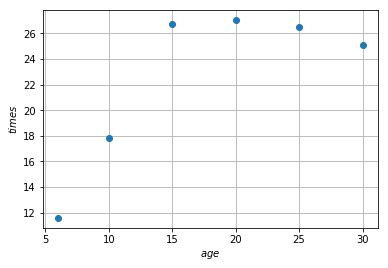

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ages = [6, 10, 15, 20, 25, 30]
times = [11.60, 17.86, 26.68, 27.01, 26.47, 25.10]

plt.plot(ages, times, marker='o', linestyle='None')
plt.grid(True)
plt.xlabel('$age$')
plt.ylabel('$times$')
plt.show()